# **Stacking and Unstacking in MultiIndex Object in Pandas**

In pandas, a multi-index object is a way to represent hierarchical data structures within a DataFrame or Series. Multi-indexing allows you to have multiple levels of row or column indices, providing a way to organize and work with complex, structured data.

"Stacking" and "unstacking" are operations that you can perform on multi-indexed DataFrames to change the arrangement of the data, essentially reshaping the data between a wide and a long format (or vice versa).

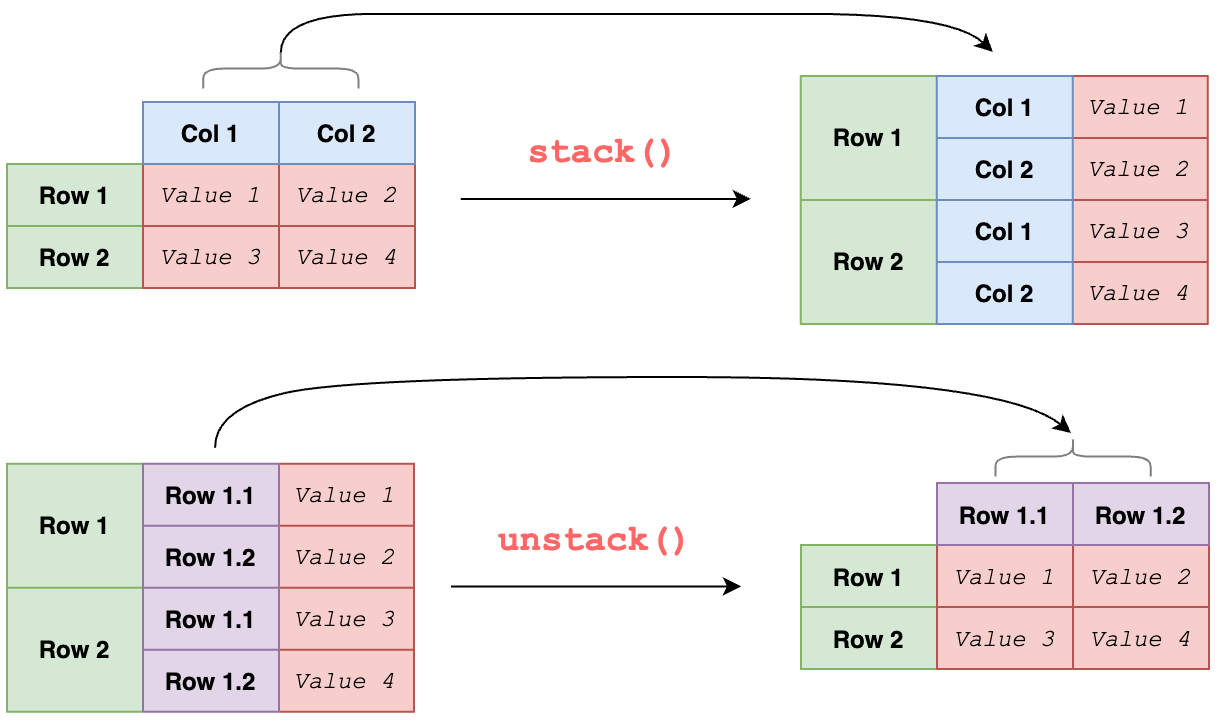


## 1. **Stacking**:
   - Stacking is the process of "melting" or pivoting the innermost level of column labels to become the innermost level of row labels.
   - This operation is typically used when you want to convert a wide DataFrame with multi-level columns into a long format.
   - You can use the `.stack()` method to perform stacking. By default, it will stack the innermost level of columns.




In [2]:
import numpy as np
import pandas as pd

In [4]:
# Create a DataFrame with multi-level columns
df = pd.DataFrame(np.random.rand(4, 4), columns=[['A', 'A', 'B', 'B'], ['X', 'Y', 'X', 'Y']])
print(df)

          A                   B          
          X         Y         X         Y
0  0.960684  0.118538  0.900984  0.485585
1  0.946716  0.049913  0.444658  0.991469
2  0.656110  0.158270  0.759727  0.203801
3  0.360581  0.965035  0.797212  0.102426


In [5]:
# Stack the innermost level of columns
stacked_df = df.stack()
print(stacked_df)

            A         B
0 X  0.960684  0.900984
  Y  0.118538  0.485585
1 X  0.946716  0.444658
  Y  0.049913  0.991469
2 X  0.656110  0.759727
  Y  0.158270  0.203801
3 X  0.360581  0.797212
  Y  0.965035  0.102426


## 2. **Unstacking**:
   - Unstacking is the reverse operation of stacking. It involves pivoting the innermost level of row labels to become the innermost level of column labels.
   - You can use the `.unstack()` method to perform unstacking. By default, it will unstack the innermost level of row labels.

Example:











In [6]:
# Unstack the innermost level of row labels
unstacked_df = stacked_df.unstack()
print(unstacked_df)

          A                   B          
          X         Y         X         Y
0  0.960684  0.118538  0.900984  0.485585
1  0.946716  0.049913  0.444658  0.991469
2  0.656110  0.158270  0.759727  0.203801
3  0.360581  0.965035  0.797212  0.102426


You can specify the level you want to stack or unstack by passing the `level` parameter to the `stack()` or `unstack()` methods. For example:

In [8]:
# Stack the second level of columns
stacked_df = df.stack(level=1)
stacked_df

A         B
0 X  0.960684  0.900984
  Y  0.118538  0.485585
1 X  0.946716  0.444658
  Y  0.049913  0.991469
2 X  0.656110  0.759727
  Y  0.158270  0.203801
3 X  0.360581  0.797212
  Y  0.965035  0.102426

In [10]:
# Unstack the first level of row labels
unstacked_df = stacked_df.unstack(level=0)
unstacked_df

A                                      B                      \
          0         1        2         3         0         1         2   
X  0.960684  0.946716  0.65611  0.360581  0.900984  0.444658  0.759727   
Y  0.118538  0.049913  0.15827  0.965035  0.485585  0.991469  0.203801   

             
          3  
X  0.797212  
Y  0.102426

In [15]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

In [16]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [17]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [18]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [20]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [21]:
branch_df1.unstack().stack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [22]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [23]:
branch_df2.stack()

delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [24]:
branch_df2.stack().stack()

2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

Stacking and unstacking can be very useful when you need to reshape your data to make it more suitable for different types of analysis or visualization. They are common operations in data manipulation when working with multi-indexed DataFrames in pandas.